In [1]:
import numpy as np
import h5py

def load_dataset():
    # Load training set
    train_dataset = h5py.File(r"C:\Users\HP\Downloads\train_catvnoncat (1).h5", "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:])  # shape (209, 64, 64, 3)
    train_set_y_orig = np.array(train_dataset["train_set_y"][:])  # shape (209,)

    # Load test set
    test_dataset = h5py.File(r"C:\Users\HP\Downloads\test_catvnoncat.h5", "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:])     # shape (50, 64, 64, 3)
    test_set_y_orig = np.array(test_dataset["test_set_y"][:])     # shape (50,)
    
    # Load classes (e.g., [b'non-cat', b'cat'])
    classes = np.array(test_dataset["list_classes"][:])

    # Reshape labels
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

# ✅ Call the function and unpack
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()


In [2]:
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
%matplotlib inline

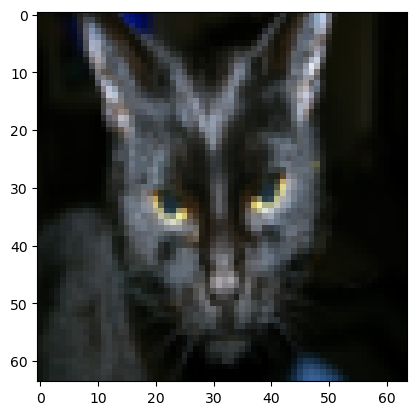

y = [1], it's a 'cat' picture.


In [3]:
index = 25
plt.imshow(train_set_x_orig[index])
plt.show()  # ← This forces image to render properly
print("y = " + str(train_set_y[:, index]) + ", it's a '" +
      classes[np.squeeze(train_set_y[:, index])].decode("utf-8") + "' picture.")


In [55]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig[0].shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_set_x shape: " + str(train_set_x_orig.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x shape: " + str(test_set_x_orig.shape))
print ("test_set_y shape: " + str(test_set_y.shape))

Number of training examples: m_train = 209
Number of testing examples: m_test = 50
Height/Width of each image: num_px = 64
Each image is of size: (64, 64, 3)
train_set_x shape: (209, 64, 64, 3)
train_set_y shape: (1, 209)
test_set_x shape: (50, 64, 64, 3)
test_set_y shape: (1, 50)


In [5]:
# Reshape the training and test examples

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T
print ("train_set_x_flatten shape: " + str(train_set_x_flatten.shape))
print ("train_set_y shape: " + str(train_set_y.shape))
print ("test_set_x_flatten shape: " + str(test_set_x_flatten.shape))
print ("test_set_y shape: " + str(test_set_y.shape))
print ("sanity check after reshaping: " + str(train_set_x_flatten[0:5,0]))

train_set_x_flatten shape: (12288, 209)
train_set_y shape: (1, 209)
test_set_x_flatten shape: (12288, 50)
test_set_y shape: (1, 50)
sanity check after reshaping: [17 31 56 22 33]


In [56]:
train_set_x = train_set_x_flatten/255.
test_set_x = test_set_x_flatten/255.

In [57]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):

    s = 1 / (1 + np.exp(-z))    
    return s

In [58]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [59]:
# GRADED FUNCTION: initialize_with_zeros

def initialize_with_zeros(dim):

    w = np.zeros((dim, 1))
    b = 0

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

In [10]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [60]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    m = X.shape[1]
    # FORWARD PROPAGATION (FROM X TO COST)
    A = sigmoid(np.dot(w.T, X) + b)            
    cost = -1/m * np.sum(Y * np.log(A) + (1-Y) * np.log(1-A))        
    
    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = 1/m * np.dot(X, (A - Y).T)
    db = 1/m * np.sum(A - Y)

    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [61]:
w, b, X, Y = np.array([[1],[2]]), 2, np.array([[1,2],[3,4]]), np.array([[1,0]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99993216]
 [1.99980262]]
db = 0.49993523062470574
cost = 6.000064773192205


In [62]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
   
    costs = []
    
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)
        dw = grads["dw"]
        db = grads["db"]
        
        # update rule 
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training examples
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [63]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.1124579 ]
 [0.23106775]]
b = 1.5593049248448891
dw = [[0.90158428]
 [1.76250842]]
db = 0.4304620716786828


In [64]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)

    for i in range(A.shape[1]):
        
        # Convert probabilities A[0,i] to actual predictions p[0,i]
        Y_prediction[0, i] = np.rint(A[0,i])
     
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction


In [65]:
print ("predictions = " + str(predict(params["w"], params["b"], X)))

predictions = [[1. 1.]]


In [71]:
# GRADED FUNCTION: model

def logistic_regression_model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [72]:
d = logistic_regression_model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
train accuracy: 99.04306220095694 %
test accuracy: 70.0 %


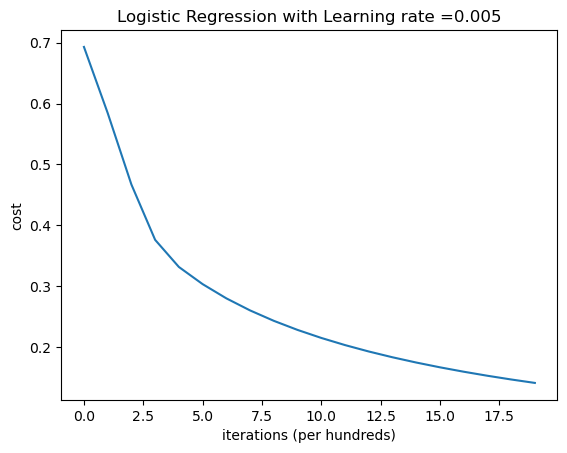

In [109]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Logistic Regression with Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 88.99521531100478 %
test accuracy: 64.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 68.42105263157895 %
test accuracy: 36.0 %

-------------------------------------------------------



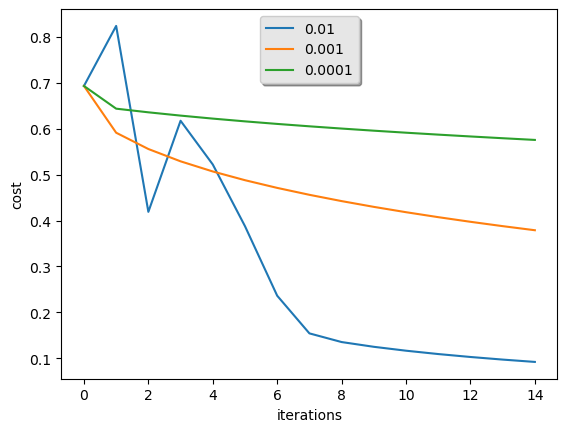

In [70]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1500, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

Interpretation:
Different learning rates give different costs and thus different predictions results.
If the learning rate is too large (0.01), the cost may oscillate up and down. It may even diverge (though in this example, using 0.01 still eventually ends up at a good value for the cost).A lower cost doesn't mean a better model. You have to check if there is possibly overfitting. It happens when the training accuracy is a lot higher than the test accuracy.In deep learning, we usually Choose the learning rate that better minimizes the cost function.

Two-layer

In [21]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [73]:
import numpy as np

def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ

def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True)  # just converting dz to a correct object.
    dZ[Z <= 0] = 0
    return dZ


In [74]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters   

In [24]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b): 
    Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [75]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [76]:
# GRADED FUNCTION: compute_cost

def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -1/m * np.sum(np.dot(Y, np.log(AL).T) + np.dot(1 - Y, np.log(1 - AL).T))
    
    cost = np.squeeze(cost) 
    assert(cost.shape == ())
    
    return cost

In [77]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [78]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [79]:
def update_parameters(parameters, grads, learning_rate):

    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters

In [107]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    grads = {}
    costs = []                             
    m = X.shape[1]                           
    (n_x, n_h, n_y) = layers_dims
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    for i in range(0, num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')
        cost = compute_cost(A2, Y)
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, 'relu')
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        parameters = update_parameters(parameters, grads, learning_rate)
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("2-Layer Neural Network with Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912676
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764732
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257517
Cost after iteration 800: 0.400797753620389
Cost after iteration 900: 0.35807050113237937
Cost after iteration 1000: 0.33942815383664116
Cost after iteration 1100: 0.3052753636196268
Cost after iteration 1200: 0.27491377282130275
Cost after iteration 1300: 0.24681768210614793
Cost after iteration 1400: 0.19850735037466122
Cost after iteration 1500: 0.17448318112556363
Cost after iteration 1600: 0.1708076297809549
Cost after iteration 1700: 0.11306524562164766
Cost after iteration 1800: 0.09629426845937143
Cost after iteration 1900: 0.0834261795972688
Cost after iteration 2000: 0.0743907870431909
Cost after iteration 2100: 0.0663074813

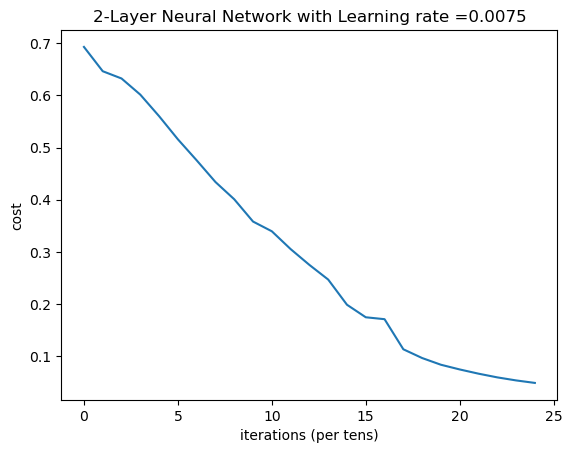

In [108]:
parameters = two_layer_model(train_set_x, train_set_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

In [84]:
def predict_2layer(X,parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Forward propagation
    A1, _ = linear_activation_forward(X, W1, b1, activation='relu')
    A2, _ = linear_activation_forward(A1, W2, b2, activation='sigmoid')

    # Convert probabilities to 0/1 predictions
    Y_prediction = (A2 > 0.5)

    return Y_prediction


In [85]:
predictions_train = predict_2layer(train_set_x, parameters)

In [86]:
predictions_test = predict_2layer(test_set_x, parameters)

In [87]:
print("Train Accuracy: {} %".format(100 - np.mean(np.abs(predictions_train - train_set_y)) * 100))


Train Accuracy: 100.0 %


In [88]:
print("Test Accuracy: {} %".format(100 - np.mean(np.abs(predictions_test - test_set_y)) * 100))

Test Accuracy: 72.0 %


It seems that your 2-layer neural network has better performance (72%) than the logistic regression implementation (70%)

In [37]:
# GRADED FUNCTION: initialize_parameters_deep
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims)            

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l - 1]) * np.sqrt(2. / layer_dims[l - 1])

        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

In [38]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache
def sigmoid_backward(dA, cache):
    Z = cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ
def relu_backward(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) 
    dZ[Z <= 0] = 0               
    return dZ


In [39]:
# GRADED FUNCTION: linear_forward

def linear_forward(A, W, b): 
    Z = np.dot(W, A) + b
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

In [40]:
# GRADED FUNCTION: linear_activation_forward

def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [41]:
# GRADED FUNCTION: L_model_forward

def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2               
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, 
                                             parameters['W' + str(l)], 
                                             parameters['b' + str(l)], 
                                             activation='relu')
        caches.append(cache)

    AL, cache = linear_activation_forward(A, 
                                          parameters['W' + str(L)], 
                                          parameters['b' + str(L)], 
                                          activation='sigmoid')
    caches.append(cache)
    assert(AL.shape == (1, X.shape[1]))
            
    return AL, caches

In [42]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    
    # 🛡️ Clip AL to avoid log(0) issues
    AL = np.clip(AL, 1e-10, 1 - 1e-10)
    
    cost = (-1 / m) * np.sum(np.multiply(Y, np.log(AL)) +
                             np.multiply(1 - Y, np.log(1 - AL)))
    
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    return cost

In [43]:
# GRADED FUNCTION: linear_backward

def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]
    dW = 1/m * np.dot(dZ, A_prev.T)
    db = 1/m * np.sum(dZ, axis=1, keepdims=True)
    dA_prev = np.dot(W.T, dZ)
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [44]:
# GRADED FUNCTION: L_model_backward

def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) 
    AL = np.clip(AL, 1e-10, 1 - 1e-10)
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    current_cache = caches[-1]
    grads["dA" + str(L)], grads["dW" + str(L)], grads["db" + str(L)] = linear_backward(sigmoid_backward(dAL, 
                                                                                                        current_cache[1]), 
                                                                                       current_cache[0])
    
    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_backward(relu_backward(grads["dA" + str(l + 2)], current_cache[1]), current_cache[0])
        grads["dA" + str(l + 1)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp
    return grads

In [45]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2 
    for l in range(L):
        parameters["W" + str(l + 1)] = parameters["W" + str(l + 1)] - learning_rate * grads["dW" + str(l + 1)]
        parameters["b" + str(l + 1)] = parameters["b" + str(l + 1)] - learning_rate * grads["db" + str(l + 1)]
    return parameters

In [89]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] 

In [105]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False): 
    np.random.seed(1)
    costs = []                        
    parameters = initialize_parameters_deep(layers_dims)
    for i in range(0, num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("4-Layer Deep Neural Network with-Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

In [ ]:
parameters = L_layer_model(train_set_x, train_set_y, layers_dims, num_iterations=2500, print_cost=True)

Cost after iteration 0: 0.811602
Cost after iteration 100: 0.667670
Cost after iteration 200: 0.633982
Cost after iteration 300: 0.605747
Cost after iteration 400: 0.562971
Cost after iteration 500: 0.415941
Cost after iteration 600: 0.320471
Cost after iteration 700: 0.232473
Cost after iteration 800: 0.148476
Cost after iteration 900: 0.087503
Cost after iteration 1000: 0.057388
Cost after iteration 1100: 0.039937
Cost after iteration 1200: 0.030271
Cost after iteration 1300: 0.024070
Cost after iteration 1400: 0.019657
Cost after iteration 1500: 0.016492
Cost after iteration 1600: 0.014169
Cost after iteration 1700: 0.012192
Cost after iteration 1800: 0.010697
Cost after iteration 1900: 0.009464
Cost after iteration 2000: 0.008488
Cost after iteration 2100: 0.007662
Cost after iteration 2200: 0.006931


In [96]:
def predict_4_layer(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2  
    p = np.zeros((1, m))
    probas, caches = L_model_forward(X, parameters)
    for i in range(0, probas.shape[1]):
        p[0, i] = 1 if probas[0, i] > 0.5 else 0

    # Print accuracy
    print("Accuracy: "  + str(np.mean(p == y) * 100) + "%")
    
    return p


In [97]:
print("Train Accuracy:")
pred_train = predict_4_layer(train_set_x, train_set_y, parameters)

print("Test Accuracy:")
pred_test = predict_4_layer(test_set_x, test_set_y, parameters)


Train Accuracy:
Accuracy: 100.0%
Test Accuracy:
Accuracy: 80.0%


Accuracy: 100.0%


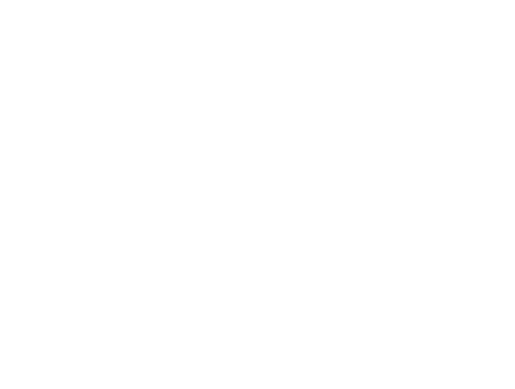

y = 1.0, your 4-layer model predicts a "cat" picture.


In [104]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Path to your image
my_image_path = r"C:\Users\HP\Downloads\download (1).png"
my_label_y = [1] 
num_px = 64

# Load, convert, and preprocess image
image = Image.open(my_image_path).convert("RGB")  # 💡 Convert to RGB
image_resized = image.resize((num_px, num_px))
image_array = np.array(image_resized).reshape((num_px * num_px * 3, 1)) / 255.

# Predict
my_predicted_image = predict_4_layer(image_array, my_label_y, parameters)

# Display image and prediction
plt.show(image)
plt.axis('off')
print("y = " + str(np.squeeze(my_predicted_image)) + 
      ", your 4-layer model predicts a \"" + 
      classes[int(np.squeeze(my_predicted_image))].decode("utf-8") + "\" picture.")
